Se cargaron 608 partículas y 20 tests de vecinos

Test 0: Central -> ID 578, Pos=(-0.426, 0.069)
   Vecino -> ID 579, Pos=(-0.418, 0.069)
   Vecino -> ID 597, Pos=(-0.426, 0.077)
   Vecino -> ID 598, Pos=(-0.418, 0.077)

Test 1: Central -> ID 392, Pos=(-0.394, -0.011)
   Vecino -> ID 391, Pos=(-0.402, -0.011)
   Vecino -> ID 393, Pos=(-0.386, -0.011)
   Vecino -> ID 410, Pos=(-0.402, -0.003)
   Vecino -> ID 411, Pos=(-0.394, -0.003)
   Vecino -> ID 412, Pos=(-0.386, -0.003)

Test 2: Central -> ID 257, Pos=(-0.41, -0.067)
   Vecino -> ID 258, Pos=(-0.402, -0.067)
   Vecino -> ID 276, Pos=(-0.41, -0.059)
   Vecino -> ID 277, Pos=(-0.402, -0.059)

Test 3: Central -> ID 260, Pos=(-0.386, -0.067)
   Vecino -> ID 261, Pos=(-0.378, -0.067)
   Vecino -> ID 279, Pos=(-0.386, -0.059)
   Vecino -> ID 280, Pos=(-0.378, -0.059)

Test 4: Central -> ID 305, Pos=(-0.482, -0.043)
   Vecino -> ID 286, Pos=(-0.482, -0.051)
   Vecino -> ID 287, Pos=(-0.474, -0.051)
   Vecino -> ID 306, Pos=(-0.474, -0.043

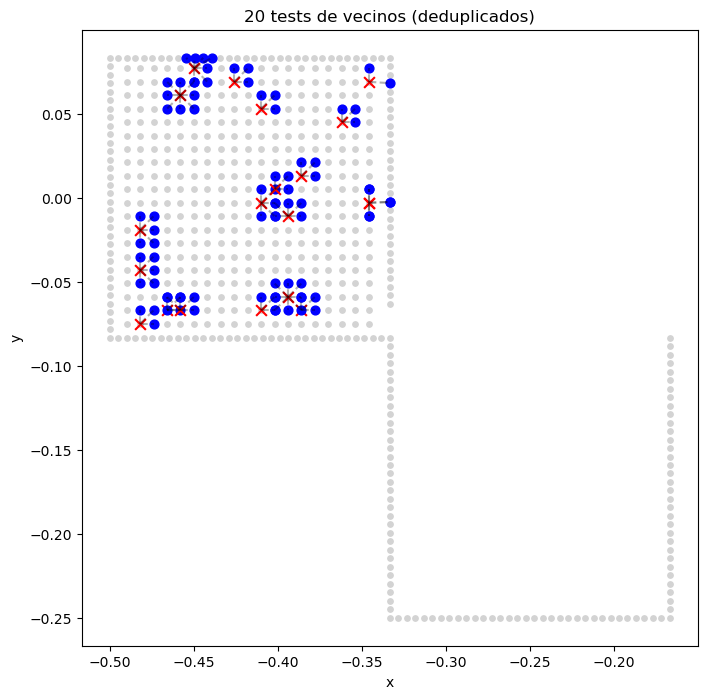

In [3]:
import matplotlib.pyplot as plt

def load_particles(filename):
    particles = []
    with open(filename, "r") as f:
        next(f)  # saltar cabecera
        for line in f:
            if line.strip() == "":
                continue
            parts = line.split()
            pid = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            particles.append((pid, x, y))
    return particles

def load_nn_output(filename="NN_test.output"):
    tests = []
    current = []
    with open(filename, "r") as f:
        for line in f:
            if line.strip() == "":
                if current:
                    tests.append(current)
                    current = []
                continue
            parts = line.split()
            pid = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            current.append((pid, x, y))
    if current:
        tests.append(current)
    return tests

def plot_all_tests(particles, tests):
    xs = [p[1] for p in particles]
    ys = [p[2] for p in particles]
    plt.figure(figsize=(8,8))
    plt.scatter(xs, ys, c="lightgray", s=15, label="Todas las partículas")

    for i, test in enumerate(tests):
        if not test:
            continue
        central = test[0]
        neighbors = test[1:]

        # Eliminar duplicados
        seen = set()
        unique_neighbors = []
        for n in neighbors:
            if n[0] not in seen:
                unique_neighbors.append(n)
                seen.add(n[0])

        # 🔎 Imprimir info para verificar
        print(f"\nTest {i}: Central -> ID {central[0]}, Pos=({central[1]}, {central[2]})")
        for n in unique_neighbors:
            print(f"   Vecino -> ID {n[0]}, Pos=({n[1]}, {n[2]})")

        # Central en rojo
        plt.scatter(central[1], central[2], c="red", s=60, marker="x")

        # Vecinos en azul
        nx = [n[1] for n in unique_neighbors]
        ny = [n[2] for n in unique_neighbors]
        plt.scatter(nx, ny, c="blue", s=40)

        # Líneas desde central a cada vecino
        for n in unique_neighbors:
            plt.plot([central[1], n[1]], [central[2], n[2]], "k--", alpha=0.3)

    plt.gca().set_aspect("equal", "box")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{len(tests)} tests de vecinos (deduplicados)")
    plt.show()

if __name__ == "__main__":
    particles = load_particles("data/salpicadura_vaciado_llenado.txt")
    tests = load_nn_output("NN_test.output")
    print(f"Se cargaron {len(particles)} partículas y {len(tests)} tests de vecinos")
    plot_all_tests(particles, tests)


In [5]:
def check_single_test(nn_file="NN_test.output", test_index=0):
    tests = load_nn_output(nn_file)
    if test_index >= len(tests):
        print(f"El índice {test_index} es mayor al número de tests ({len(tests)})")
        return
    
    test = tests[test_index]
    central = test[0]
    neighbors = test[1:]

    seen = set()
    unique_neighbors = []
    for n in neighbors:
        if n[0] not in seen:
            unique_neighbors.append(n)
            seen.add(n[0])

    print(f"\nVerificación del test {test_index}:")
    print(f"  Central -> ID {central[0]}, Pos=({central[1]}, {central[2]})")
    for n in unique_neighbors:
        print(f"  Vecino -> ID {n[0]}, Pos=({n[1]}, {n[2]})")

if __name__ == "__main__":
    check_single_test("NN_test.output", test_index=0)  # Cambia índice según quieras



Verificación del test 0:
  Central -> ID 578, Pos=(-0.426, 0.069)
  Vecino -> ID 579, Pos=(-0.418, 0.069)
  Vecino -> ID 597, Pos=(-0.426, 0.077)
  Vecino -> ID 598, Pos=(-0.418, 0.077)
